# Opcode N-grams Extraction

## Setup

In [1]:
import os
import pandas as pd
from pathlib import Path
import json
import re

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from evmdasm import EvmBytecode

In [2]:
PATH = Path.cwd().parents[1]
DATA_PATH = os.path.join(PATH, 'data')
NAME = 'crpwarner'
IN_PATH = os.path.join(DATA_PATH, f'external/{NAME}/groundtruth/hex')
OUT_PATH = os.path.join(DATA_PATH, f'interim/{NAME}')
PRO_PATH = os.path.join(DATA_PATH, 'processed/opcode_n_grams')
df = pd.read_csv(os.path.join(OUT_PATH, 'dataset-modified.csv')).set_index('address')

## Load Bytecode

In [3]:
def load_bytecode(file_path):
    with open(file_path, 'r') as f:
        return f.read().strip()


## Disassemble to Opcode Sequence

In [4]:
def get_opcode_sequence(bytecode):
    evm_code = EvmBytecode(bytecode)
    opcodes = []
    for instr in evm_code.disassemble():
        opcode = instr.name
        # Extract the first alphanumeric-only word (no digits, no special characters)
        match = re.match(r'^[a-zA-Z]+', opcode)

        if match:
            opcode_group = match.group()
            opcodes.append(opcode_group)
        else:
            opcodes.append(opcode)
    return ' '.join(opcodes)


## Build Dataset

In [5]:
hex_dir = Path(IN_PATH)
all_files = list(hex_dir.glob('*.hex'))

records = []
for file in all_files:
    freq = dict()
    bytecode = load_bytecode(file)
    freq['opcode_sequence'] = get_opcode_sequence(bytecode)
    freq['address'] = file.stem.lower()
    records.append(freq)

seq_df = pd.DataFrame(records).fillna(0).set_index('address')

vectorizer = CountVectorizer(ngram_range=(2, 3), analyzer='word', max_features=1000)
X_ngrams = vectorizer.fit_transform(seq_df['opcode_sequence'])

feature_df = pd.DataFrame(X_ngrams.toarray(), columns=vectorizer.get_feature_names_out())
feature_df['address'] = seq_df.index
feature_df = feature_df.set_index('address')
feature_df.head()

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH13
invalid instruction: PUSH31
invalid instruction: PUSH25
invalid instruction: PUSH16
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH21
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH19
invalid instruction: PUSH29
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH20
invalid instruction: PUSH17
invalid instruction: PUSH16
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH32
invalid instruction: PUSH29


,add add,add add mstore,add add swap,add and,add and dup,add calldataload,add calldataload push,add calldataload swap,add dup,add dup add,...,unknown log push,unknown push,unknown push dup,unknown push push,unknown slt,unknown slt sha,unknown swap,unknown swap dup,unknown unknown,unknown unknown unknown
address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,3,0
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,2,1,0,0,0,2,0,2,3,1,...,0,1,0,0,0,0,0,0,2,1
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,3,0,3,0,0,2,0,2,9,1,...,1,0,0,0,1,1,0,0,6,4
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,0,0,0,0,0,7,5,1,22,2,...,0,2,0,0,0,0,0,0,0,0
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,0,0,0,4,4,15,9,4,64,2,...,0,2,0,0,0,0,0,0,0,0


## Visualize or Export

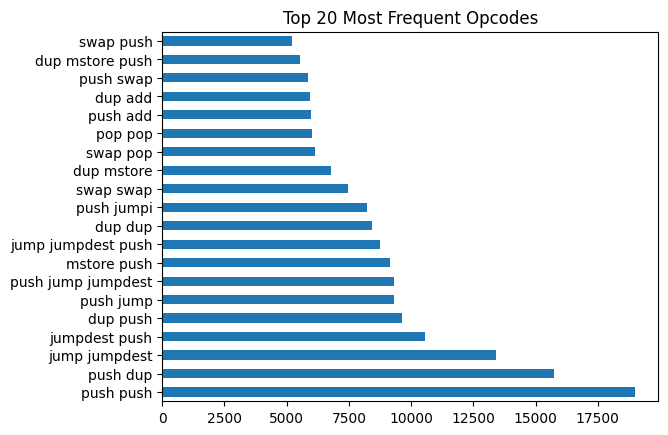

In [6]:
feature_df.sum().sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 Most Frequent Opcodes")
plt.show()

In [7]:
feature_df.to_csv(os.path.join(OUT_PATH, 'opcode_freq.csv'))

## Export Labels & Feature Columns

In [8]:
labels = list(df.columns)
features = list(feature_df.columns)
with open(os.path.join(PRO_PATH, 'labels.json'), "w") as f:
    json.dump(labels, f, indent=2)

with open(os.path.join(PRO_PATH, 'features.json'), "w") as f:
    json.dump(features, f, indent=2)

## Merge with Labels Dataframe

In [9]:
df = df.merge(feature_df, left_index=True, right_index=True)
df.select_dtypes(float).fillna(0).astype(int)
df.head()

,mint,leak,limit,add add,add add mstore,add add swap,add and,add and dup,add calldataload,add calldataload push,...,unknown log push,unknown push,unknown push dup,unknown push push,unknown slt,unknown slt sha,unknown swap,unknown swap dup,unknown unknown,unknown unknown unknown
address,,,,,,,,,,,,,,,,,,,,,
0x93023f1d3525e273f291b6f76d2f5027a39bf302,1,0,1,1,1,0,0,0,4,0,...,1,0,0,0,1,1,0,0,0,0
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,0,0,1,3,0,3,0,0,2,0,...,1,0,0,0,1,1,0,0,6,4
0x94b7d24552933f50a5a5705c446528806dcea381,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
0xe0b9d4146aad6936cbfcbe4dae47e34aab96b093,0,0,0,0,0,0,4,3,0,0,...,1,0,0,0,1,1,0,0,3,1
0x10f6f2b97f3ab29583d9d38babf2994df7220c21,1,0,1,4,0,2,4,3,1,1,...,1,1,0,1,1,1,0,0,0,0


In [10]:
df.to_csv(os.path.join(PRO_PATH, 'dataset.csv'))